Analyzing billionaire data from all over the world. dataset is found from Kaggle and Contains global information about billionaries in 2021 including their:-

-names
-networth
-Country
-Source
-rank
-Age
-Industry

In [75]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [62]:
# Loading the data
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [63]:
# checking for data description
data.describe(include="all")

,Name,NetWorth,Country,Source,Rank,Age,Industry
count,2755,2755,2755,2755,2755.000000,2676.000000,2755
unique,2752,245,70,924,NaN,NaN,18
top,Robert Miller,$1.1 B,United States,real estate,NaN,NaN,Finance & Investments
freq,2,150,724,171,NaN,NaN,371
mean,NaN,NaN,NaN,NaN,1345.663521,63.113602,NaN
std,NaN,NaN,NaN,NaN,772.669811,13.445153,NaN
min,NaN,NaN,NaN,NaN,1.000000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,680.000000,54.000000,NaN
50%,NaN,NaN,NaN,NaN,1362.000000,63.000000,NaN
75%,NaN,NaN,NaN,NaN,2035.000000,73.000000,NaN


In [64]:
# checking for missing values
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

there are 79 missing values in age. I will fill these values with the mean age 

In [65]:
mean_value=data['Age'].mean()
data['Age_filled']=data['Age'].fillna(mean_value)

In [66]:
data.isnull().sum()

Name           0
NetWorth       0
Country        0
Source         0
Rank           0
Age           79
Industry       0
Age_filled     0
dtype: int64

In [67]:
data.drop('Age', axis='columns', inplace=True)
data

,Name,NetWorth,Country,Source,Rank,Industry,Age_filled
0,Jeff Bezos,$177 B,United States,Amazon,1,Technology,57.0
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,Automotive,49.0
2,Bernard Arnault & family,$150 B,France,LVMH,3,Fashion & Retail,72.0
3,Bill Gates,$124 B,United States,Microsoft,4,Technology,65.0
4,Mark Zuckerberg,$97 B,United States,Facebook,5,Technology,36.0
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,Technology,49.0
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,Manufacturing,65.0
2752,Zhao Meiguang,$1 B,China,gold mining,2674,Metals & Mining,58.0
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,Diversified,58.0


Next we clean the networth column by removinv the $ and B at the beginign and the end fo teh values

In [68]:
data['NetWorth'] = data['NetWorth'].str.strip("B")
data['NetWorth'] = data['NetWorth'].str.strip("$")
data['NetWorth'] = data['NetWorth'].astype(float)
data

,Name,NetWorth,Country,Source,Rank,Industry,Age_filled
0,Jeff Bezos,177.0,United States,Amazon,1,Technology,57.0
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,Automotive,49.0
2,Bernard Arnault & family,150.0,France,LVMH,3,Fashion & Retail,72.0
3,Bill Gates,124.0,United States,Microsoft,4,Technology,65.0
4,Mark Zuckerberg,97.0,United States,Facebook,5,Technology,36.0
...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,Technology,49.0
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,Manufacturing,65.0
2752,Zhao Meiguang,1.0,China,gold mining,2674,Metals & Mining,58.0
2753,Zhong Naixiong,1.0,China,conglomerate,2674,Diversified,58.0


### Next we visualise the top 10 billionaires in the world


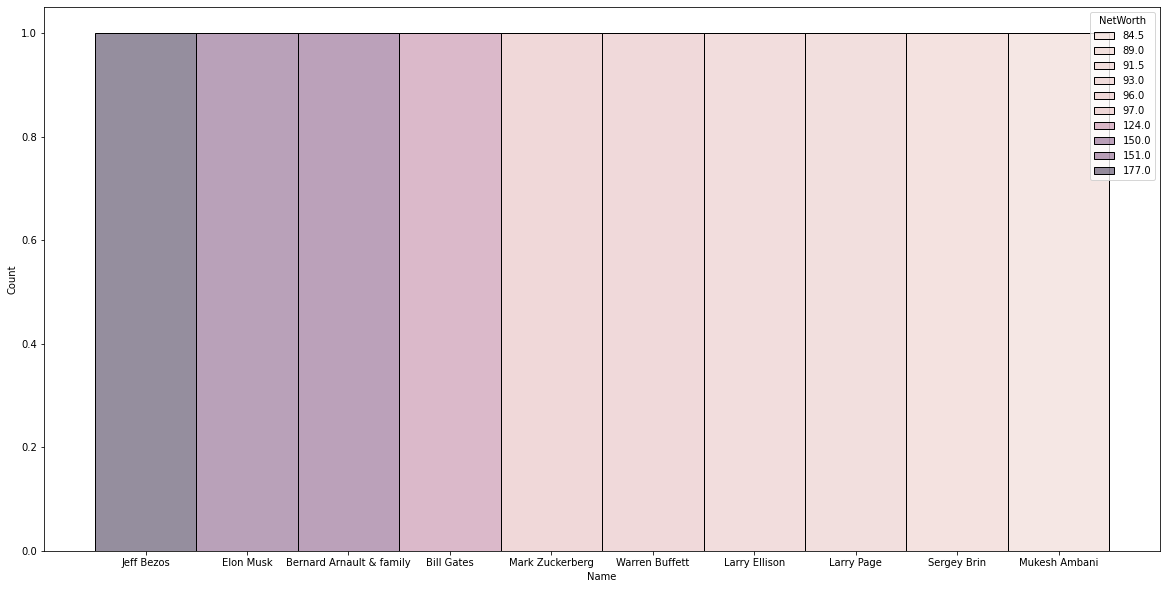

In [69]:
df = data.sort_values(by = ['NetWorth'], ascending = False).head(10)
plt.figure(figsize=(20, 10))
sns.histplot(x="Name", hue="NetWorth", data=df)
plt.show()

### Next we check the top 10 domains with the most number of billionaires

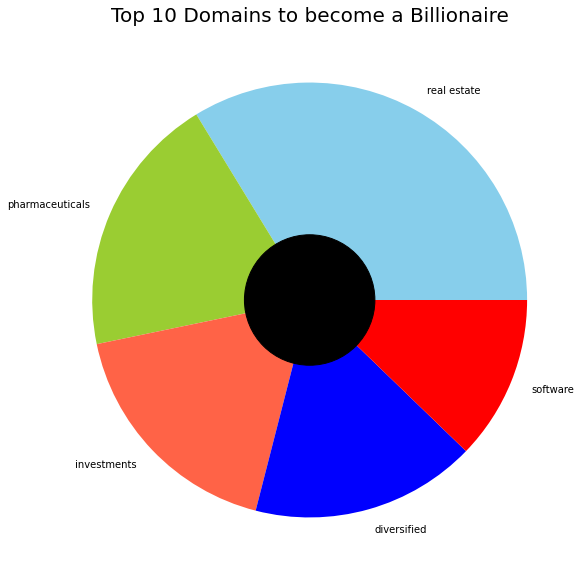

In [70]:
a = data["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["Skyblue", "Yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize=(10, 10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.3, color='black')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=10)
plt.title("Top 10 Domains to become a Billionaire", fontsize=20)
plt.show()

Top 10 Industries with most Billionarires

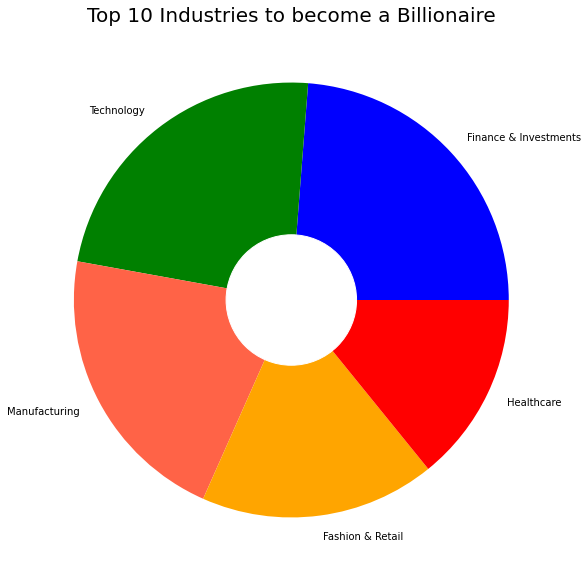

In [71]:
a = data["Industry"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["blue", "green", "tomato", "orange", "red"]
plt.figure(figsize=(10, 10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=10)
plt.title("Top 10 Industries to become a Billionaire", fontsize=20)
plt.show()

Top 10 countries with most Billionaires

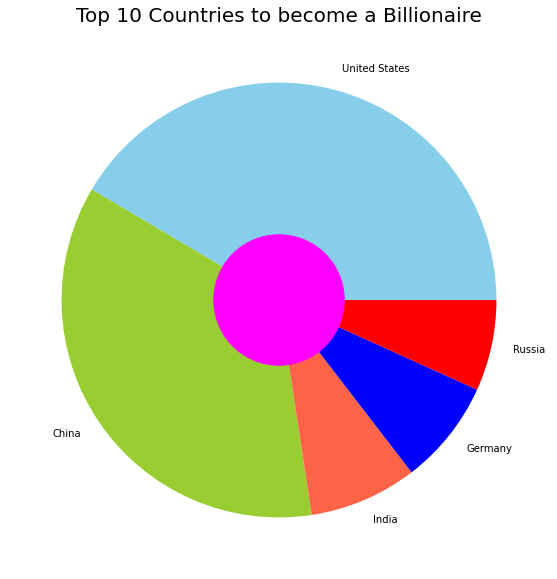

In [72]:
a = data["Country"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["Skyblue", "Yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize=(10, 10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.3, color='magenta')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=10)
plt.title("Top 10 Countries to become a Billionaire", fontsize=20)
plt.show()

In [82]:
d = data[["Industry","Country", "Source", "NetWorth"]]
figure = px.sunburst(d, path=["Country", "Industry", "Source"],
                    values = "NetWorth",
                    width = 750, height=750, color_continuous_scale="RdY1Gn",
                    title="Billionaires disribution in the World")
figure.show()